In [1]:
import pandas as pd

## Greenhouse emission data

In [32]:
co2 = pd.read_csv('ghg/co2.csv')
ch4 = pd.read_csv('ghg/ch4.csv')
hfc = pd.read_csv('ghg/hfc.csv')
n2o = pd.read_csv('ghg/n2o.csv')
nf3 = pd.read_csv('ghg/nf3.csv')
pfc = pd.read_csv('ghg/pfc.csv')
sf6 = pd.read_csv('ghg/sf6.csv')

In [54]:
l = ch4.groupby('Year').sum()

In [ ]:
val = l['Value'].tolist()

## Ocean heat content

### load and renmaing columns

In [274]:
ocean = pd.read_csv('oceans/t00mn1.csv', delimiter=' ', header=None, dtype=np.float64)

In [275]:
ocean.columns = range(10)

In [276]:
ocean.to_csv('oceans/data.csv')

In [277]:
ocean = pd.DataFrame(data=ocean.values.reshape((5940, 360)), columns=range(360))

In [278]:
ocean = ocean.replace(-99.0, np.NaN)

In [279]:
import numpy as np

years = []
for i in range(66):
    y = [1955 + i] * 90
    years.extend(y)

years = np.array(years)

In [280]:
ocean['year'] = years

In [281]:
ocean.to_csv('oceans/year_data.csv')

In [308]:
_median = ocean.groupby('year').median()
_mean = ocean.groupby('year').mean()
_variance = ocean.groupby('year').var()
_max = ocean.groupby('year').max()
_min = ocean.groupby('year').min()

In [309]:
_median = _median.min(axis=1).values
_mean = _mean.min(axis=1).values
_variance = _variance.min(axis=1).values
_max = _max.min(axis=1).values
_min = _min.min(axis=1).values

In [314]:
df = pd.DataFrame(data={
    'median': _median, 
    'mean': _mean, 
    'variance': _variance, 
    'max': _max, 
    'min': _min,
    'year': range(1955, 2021)
})

In [318]:
df.to_csv('oceans/summerized_data.csv')

In [268]:
l = ocean.groupby('year').min()

In [269]:
l.head()

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,median,mean,variance,max,min
year,,,,,,,,,,,,,,,,,,,,,
1955,-1.3234,-0.7585,-1.2392,-0.3234,-1.2887,-0.8942,-1.8383,-1.4541,-1.2120,-0.8860,...,-1.3029,-1.6535,-1.2935,-1.4105,-0.8164,1.35790,3.908298,31.986044,20.7569,-2.2577
1956,-1.8250,-1.8131,-1.6808,-1.7852,-1.4664,-1.8389,-1.8300,-1.8496,-1.8366,-1.8425,...,-1.7900,-1.7700,-1.7810,-1.7800,-1.7780,3.40840,7.599363,63.871600,28.5906,-2.5984
1957,-1.1270,-0.8375,-1.3144,-0.3118,-1.0619,-0.8173,-1.5353,-1.4068,-1.1795,-0.8846,...,-1.2261,-1.5021,-1.3422,-1.4118,-0.9733,4.02585,7.417669,51.629944,27.3853,-2.4426
1958,-1.8300,-1.8189,-1.8206,-1.7974,-1.6955,-1.8164,-1.8175,-1.8496,-1.8394,-1.8446,...,-1.7900,-1.7700,-1.7835,-1.7905,-1.7795,3.15100,5.508078,46.956186,27.4867,-2.2503
1959,-1.2314,-0.9614,-1.2660,-0.3436,-1.4038,-1.4431,-1.5338,-1.4473,-1.2266,-1.1031,...,-1.3417,-1.5393,-1.3449,-1.4120,-1.1939,NaN,NaN,NaN,NaN,NaN


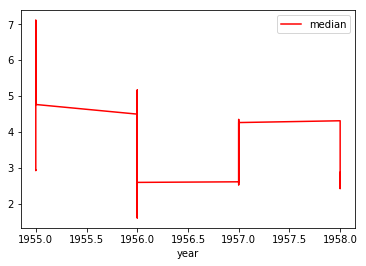

In [228]:
ocean.plot(kind='line',x='year',y='median',color='red')

In [57]:
base = val[-1]
arr = []
for value in val:
    arr.append((value - base)/base)

In [126]:
import numpy as np

arr = np.array([[1, 2], [3, 4], [5, 6]])

In [127]:
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

In [128]:
arr.reshape((2, 3))

array([[1, 2, 3],
       [4, 5, 6]])